In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
import numpy as np

In [2]:
num_epochs = 6
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [3]:
DATA_PATH = '.'
MODEL_STORE_PATH = '.'

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

0.7%

100.0%


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100.0%


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



9.9%

100.0%


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100.0%

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        # self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        # out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [5]:
model = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))


Epoch [1/6], Step [100/600], Loss: 0.4773, Accuracy: 92.00%
Epoch [1/6], Step [200/600], Loss: 0.0983, Accuracy: 97.00%
Epoch [1/6], Step [300/600], Loss: 0.0471, Accuracy: 98.00%
Epoch [1/6], Step [400/600], Loss: 0.0067, Accuracy: 100.00%
Epoch [1/6], Step [500/600], Loss: 0.1011, Accuracy: 97.00%
Epoch [1/6], Step [600/600], Loss: 0.0406, Accuracy: 98.00%
Epoch [2/6], Step [100/600], Loss: 0.0691, Accuracy: 98.00%
Epoch [2/6], Step [200/600], Loss: 0.0169, Accuracy: 99.00%
Epoch [2/6], Step [300/600], Loss: 0.0360, Accuracy: 98.00%
Epoch [2/6], Step [400/600], Loss: 0.0131, Accuracy: 99.00%
Epoch [2/6], Step [500/600], Loss: 0.0301, Accuracy: 99.00%
Epoch [2/6], Step [600/600], Loss: 0.0053, Accuracy: 100.00%
Epoch [3/6], Step [100/600], Loss: 0.0830, Accuracy: 98.00%
Epoch [3/6], Step [200/600], Loss: 0.0300, Accuracy: 99.00%
Epoch [3/6], Step [300/600], Loss: 0.0314, Accuracy: 99.00%
Epoch [3/6], Step [400/600], Loss: 0.1079, Accuracy: 98.00%
Epoch [3/6], Step [500/600], Loss: 0.0

In [7]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(model.state_dict(), MODEL_STORE_PATH + 'conv_net_model.ckpt')

Test Accuracy of the model on the 10000 test images: 98.87 %


In [8]:
from matplotlib import pyplot as plt

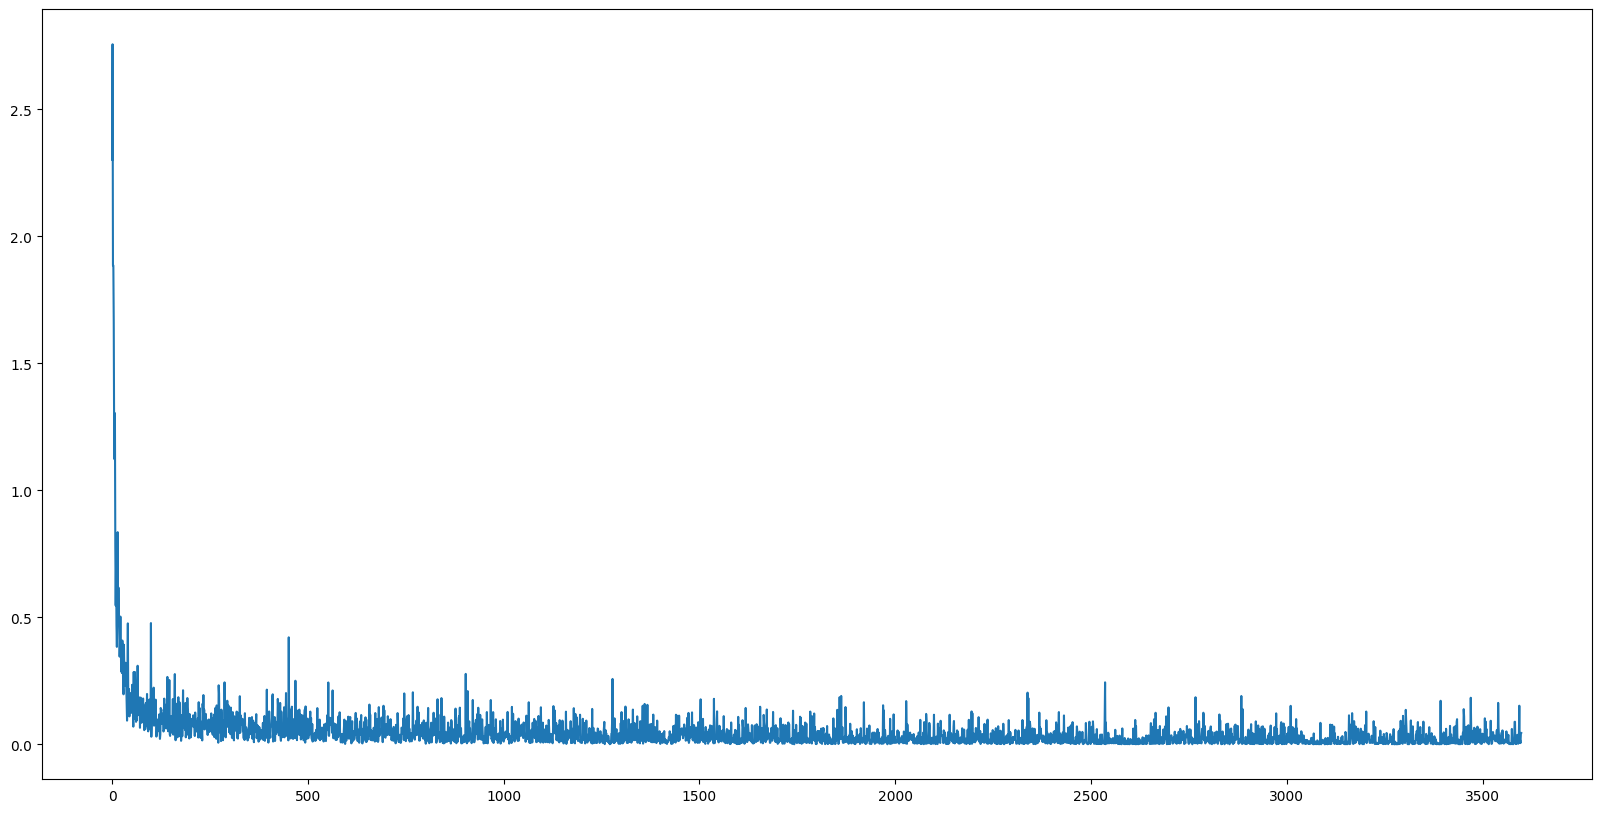

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(loss_list)), loss_list)

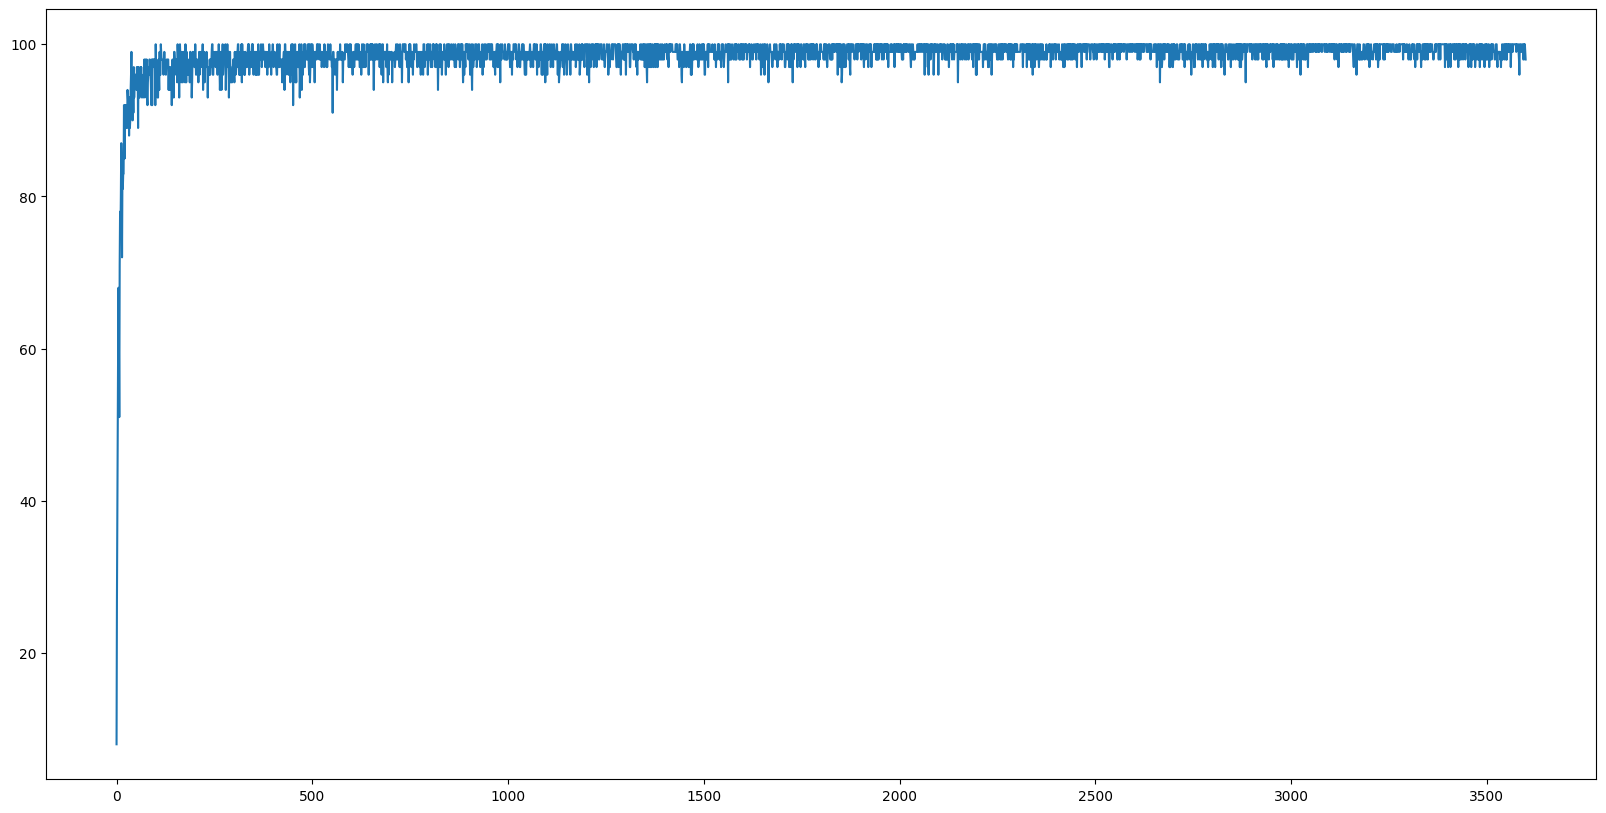

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(loss_list)), np.array(acc_list) * 100)